In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Weather data for Germany
DeEc15 = pd.read_hdf("Temp/DEU_TEMP_EC15.h5")
DeGefs = pd.read_hdf("Temp/DEU_TEMP_GEFS.h5")

In [3]:
#Restricting to a sample of 1 week
DeEc15Sample = DeEc15[(DeEc15.ValueDateTime.dt.year == 2022) & (DeEc15.ValueDateTime.dt.month == 1) & (DeEc15.ValueDateTime.dt.isocalendar().week == 1)]
DeGefsSample = DeGefs[(DeGefs.ValueDateTime.dt.year == 2022) & (DeGefs.ValueDateTime.dt.month == 1) & (DeGefs.ValueDateTime.dt.isocalendar().week == 1)]

In [5]:
# forecast window is the difference between ValueDateTime and ValueDateTime divided by 6 hours
DeEc15Sample["ForecastWindow"] = (DeEc15Sample["ValueDateTime"] - DeEc15Sample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6
DeGefsSample["ForecastWindow"] = (DeGefsSample["ValueDateTime"] - DeGefsSample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6

# these data points need some cleaning, they are not valid we forecast at 2009-12-17 for 2009-01-01, most probably ValueDateTime should be
# 2010-01-01
DeEc15Sample["ForecastWindow"].max()

<ipython-input-5-cfde776143ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DeEc15Sample["ForecastWindow"] = (DeEc15Sample["ValueDateTime"] - DeEc15Sample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6
<ipython-input-5-cfde776143ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DeGefsSample["ForecastWindow"] = (DeGefsSample["ValueDateTime"] - DeGefsSample["ForecastDateTime"]).dt.total_seconds() / 3600 / 6


61.0

In [6]:
# calculate std and mean value for each ValueDateTime for each ForecastWindow
DeEc15Mean = DeEc15Sample.groupby(["ValueDateTime", "ForecastWindow"])["value"].mean().reset_index()
DeEc15Std = DeEc15Sample.groupby(["ValueDateTime", "ForecastWindow"])["value"].std().reset_index()
DeEc15Mean['+1std'] = DeEc15Mean['value'] + DeEc15Std['value']
DeEc15Mean['-1std'] = DeEc15Mean['value'] - DeEc15Std['value']
DeGefsMean = DeGefsSample.groupby(["ValueDateTime", "ForecastWindow"])["value"].mean().reset_index()
DeGefsStd = DeGefsSample.groupby(["ValueDateTime", "ForecastWindow"])["value"].std().reset_index()
DeGefsMean['+1std'] = DeGefsMean['value'] + DeGefsStd['value']
DeGefsMean['-1std'] = DeGefsMean['value'] - DeGefsStd['value']

In [7]:
RealityDeEc15 = DeEc15Sample[(DeEc15Sample.ens_num == 0) & (DeEc15Sample.ForecastDateTime == DeEc15Sample.ValueDateTime)]
RealityDeEc15['model'] = "EC15"
RealityDeGefs = DeGefsSample[(DeGefsSample.ens_num == 0) & (DeGefsSample.ForecastDateTime == DeGefsSample.ValueDateTime)]
RealityDeGefs['model'] = "GEFS"

#Reality = RealityDeGefs.append(RealityDeEc15).sort_values(by=['ForecastDateTime'])
#Reality

<ipython-input-7-ade94c7a1d95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RealityDeEc15['model'] = "EC15"
<ipython-input-7-ade94c7a1d95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RealityDeGefs['model'] = "GEFS"


In [8]:
DeEc15Mean.ValueDateTime.unique()

array(['2022-01-03T00:00:00.000000000', '2022-01-03T06:00:00.000000000',
       '2022-01-03T12:00:00.000000000', '2022-01-03T18:00:00.000000000',
       '2022-01-04T00:00:00.000000000', '2022-01-04T06:00:00.000000000',
       '2022-01-04T12:00:00.000000000', '2022-01-04T18:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-05T06:00:00.000000000',
       '2022-01-05T12:00:00.000000000', '2022-01-05T18:00:00.000000000',
       '2022-01-06T00:00:00.000000000', '2022-01-06T06:00:00.000000000',
       '2022-01-06T12:00:00.000000000', '2022-01-06T18:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2022-01-07T06:00:00.000000000',
       '2022-01-07T12:00:00.000000000', '2022-01-07T18:00:00.000000000',
       '2022-01-08T00:00:00.000000000', '2022-01-08T06:00:00.000000000',
       '2022-01-08T12:00:00.000000000', '2022-01-08T18:00:00.000000000',
       '2022-01-09T00:00:00.000000000', '2022-01-09T06:00:00.000000000',
       '2022-01-09T12:00:00.000000000', '2022-01-09

In [9]:
DeEc15Mean.ForecastWindow.min()

0.0

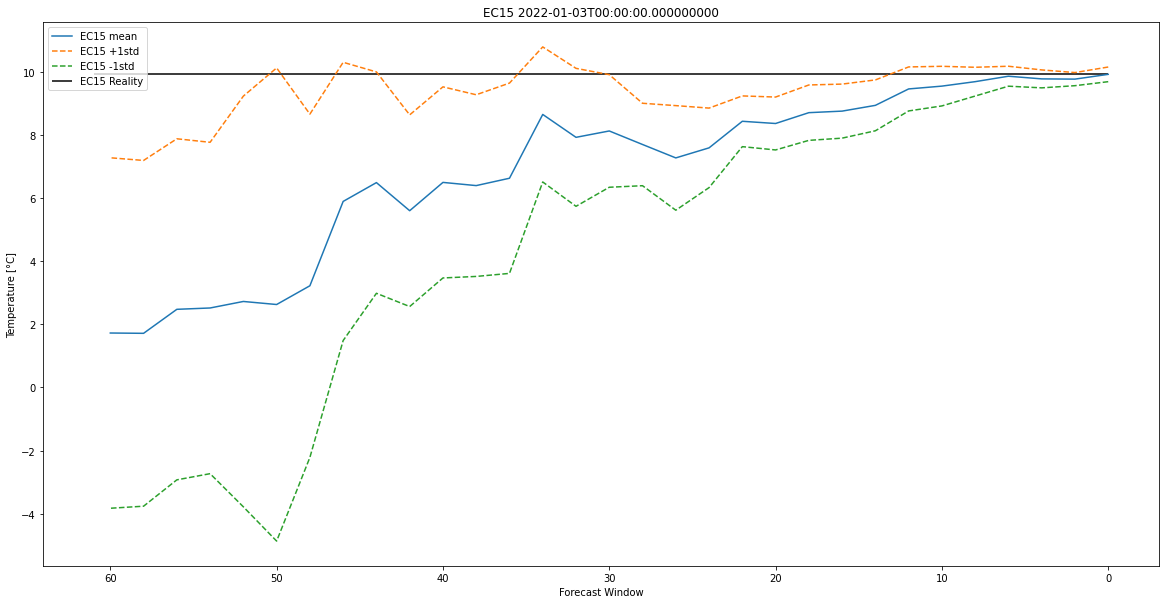

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ValueDateTime = DeEc15Mean.ValueDateTime.unique()[0]
DeEc15Mean[DeEc15Mean.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='value', ax=ax, label='EC15 mean').invert_xaxis()
DeEc15Mean[DeEc15Mean.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='+1std', ax=ax, label='EC15 +1std', linestyle='dashed')
DeEc15Mean[DeEc15Mean.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='-1std', ax=ax, label='EC15 -1std', linestyle='dashed')
ax.hlines(y=RealityDeEc15[RealityDeEc15.ValueDateTime == ValueDateTime].value.values[0], xmin=DeEc15Mean.ForecastWindow.min(),
        xmax=DeEc15Mean.ForecastWindow.max(), color='black', label='EC15 Reality', linestyle='-')
#RealityDeEc15[RealityDeEc15.ValueDateTime == ValueDateTime].plot(x='ForecastWindow', y='value', ax=ax, label='EC15 Reality', marker='o', linestyle='None')
ax.set_xlabel("Forecast Window")
ax.set_ylabel("Temperature [°C]")
ax.set_title("EC15 " + str(ValueDateTime))
ax.legend()
plt.show()